In [2]:
# @title set environment
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import cv2

In [3]:
# @title PLA algorithm
def PLA_no_bias(X, y, number_of_generations ):
    N,d = X.shape
    normal = np.random.randn(d,)
    
    for _ in range(number_of_generations):
        # find one wrong sample
        for i in range(N):
            if np.dot(X[i], normal) * y[i] <= 0:
                normal += y[i] * X[i]
                # print accuracy
                if _ % 100 == 99:
                    print("Iter %s: %s"
                            %(_+1, (np.sign(np.dot(X, normal)) == y).mean()))
                break
        else:
            break
    return normal, (np.sign(np.dot(X, normal)) == y).mean()

def PLA_with_bias(X, y, number_of_generations):
    N,d = X.shape
    augX = np.hstack([np.ones((N,1)), X])
    bias_normal,acc = PLA_no_bias(augX, y, number_of_generations)
    return bias_normal[0], bias_normal[1:], acc

In [4]:
# @title read dataset
path = "./Dataset/File_list.txt"
image_data=[]
lable_data=[]
with open(path) as f:
    text=f.read()
    list=text.split('\n')
for line in list:
    img = cv2.imread(line, cv2.IMREAD_GRAYSCALE)
    img=np.reshape(img, (1, 900))
    
    if((line[10]=='M')):
        image_data.append(img[0])
        lable_data.append(1)
    if((line[10]=='H')):
        image_data.append(img[0])
        lable_data.append(-1)
image_data=np.array(image_data)
lable_data=np.array(lable_data)

In [5]:
# @title ditect setting
number_of_generation=1000 # @param {type:"number"}
bias,normal,acc=PLA_with_bias(image_data, lable_data, number_of_generation)

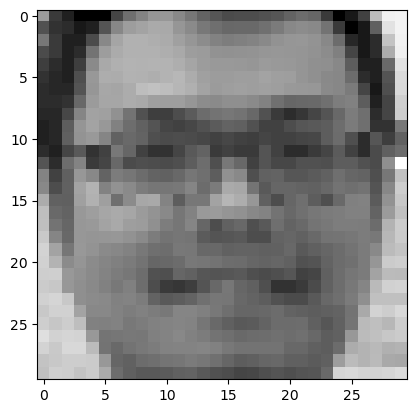

This is a picture of human


In [13]:
# @title ditect the image
User_path="professor.png" # @param {type:"string"}
img = cv2.imread(User_path, cv2.IMREAD_GRAYSCALE)
imgplot = plt.imshow(img,cmap='gray')
plt.show(imgplot)
img = np.reshape(img,(1, 900))[0]
if(np.dot(img,normal)-bias>0):
    print("This is a picture of monkey")
else:
    print("This is a picture of human")

[0.4142857142857143, 0.45714285714285713, 0.5, 0.5, 0.5, 0.5, 0.5571428571428572, 0.5, 0.5, 0.6285714285714286, 0.5, 0.5571428571428572, 0.5, 0.5, 0.6571428571428571, 0.5, 0.5, 0.8428571428571429, 0.5, 0.6, 0.7142857142857143, 0.5, 0.8857142857142857, 0.5, 0.7, 0.6285714285714286, 0.6571428571428571, 0.8857142857142857, 0.6, 0.5, 0.5, 0.8857142857142857, 0.5285714285714286, 0.5, 0.9, 0.5, 0.7714285714285715, 0.6285714285714286, 0.6571428571428571, 0.8428571428571429, 0.5428571428571428, 0.9428571428571428, 0.7, 0.8714285714285714, 0.5, 0.8, 0.9285714285714286, 0.6857142857142857, 0.9142857142857143, 0.5857142857142857, 0.9285714285714286, 0.5142857142857142, 0.8714285714285714, 0.5142857142857142, 0.8, 0.8285714285714286, 0.5142857142857142, 0.5428571428571428, 0.9285714285714286, 0.5428571428571428, 0.9571428571428572, 0.5571428571428572, 0.8714285714285714, 0.6, 0.6, 0.5142857142857142, 0.9285714285714286, 0.6, 0.9857142857142858, 0.7714285714285715, 0.8571428571428571, 0.9, 0.728571

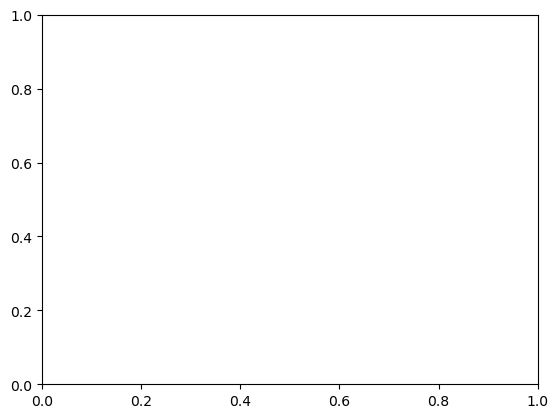

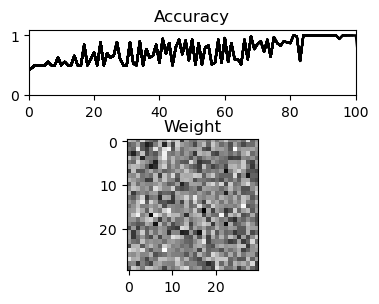

In [12]:
# @title Generration aimation
fig,imgplot= plt.subplots()
fig,imgplot= plt.subplots(2,1,figsize=(4,3), gridspec_kw={'height_ratios': [1,2]}) 
fig.tight_layout()
accuracy=[]
def run(data):
    bias,normal,acc=PLA_with_bias(image_data, lable_data, data)
    weight=normal
    weight=np.reshape(weight, (30, 30))
    imgplot[1].imshow(weight,cmap='gray')
    accuracy.append(acc)
    x = np.array(range(0, len(accuracy)))
    y = np.array(accuracy)
    imgplot[0].axis([0, 100, 0, 1.1])
    imgplot[0].plot(x, y, color="black")

imgplot[1].set_title("Weight")
imgplot[0].set_title("Accuracy")
ani = animation.FuncAnimation(fig, run, frames=100) 
ani.save('generation_animation.gif', fps=10)
print(accuracy)